DATA ANALYSIS


Description: This Program uses and artificial recurrent neural network called Long Short Term memort (LSTM)
to predict the closing stock price of a corporation (Apple Inc.) using the past 60 day stock price.

In [ ]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
import yfinance as yf
plt.style.use('fivethirtyeight')

In [ ]:
import yfinance as yf

# Fetch the stock data
df = yf.download('AAPL', start='2012-01-01', end='2019-12-17')

# Show the data
df.head()


[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2012-01-03,14.621429,14.732143,14.607143,14.686786,12.416982,302220800
2012-01-04,14.642857,14.810000,14.617143,14.765714,12.483712,260022000
2012-01-05,14.819643,14.948214,14.738214,14.929643,12.622306,271269600
2012-01-06,14.991786,15.098214,14.972143,15.085714,12.754257,318292800
2012-01-09,15.196429,15.276786,15.048214,15.061786,12.734029,394024400


In [ ]:
df.shape

(2002, 6)

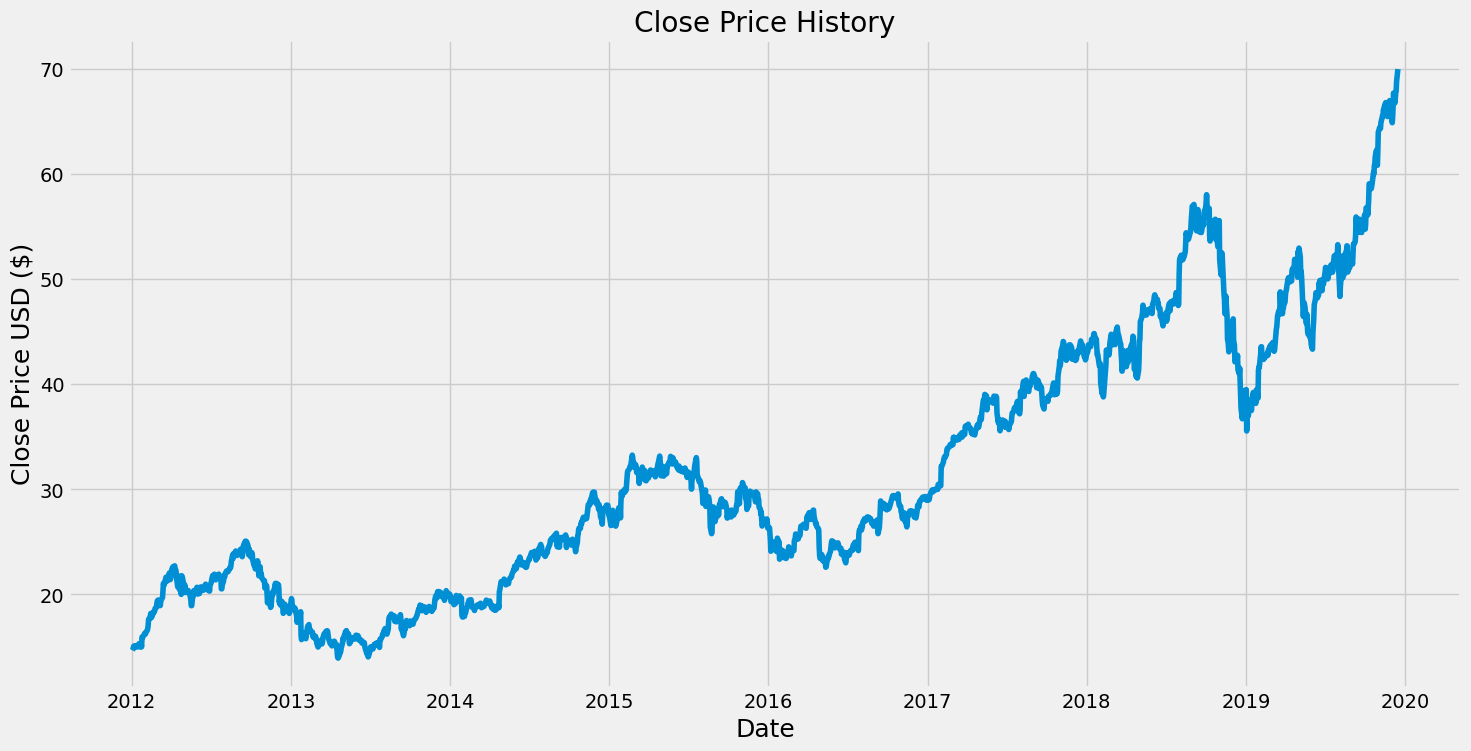

In [ ]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [ ]:
data = df.filter(['Close'])
dataset = data.values
training_data_len = math.ceil( len(dataset) *.8)
training_data_len

1602

In [ ]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.0131974 ],
       [0.01460639],
       [0.01753278],
       ...,
       [0.96251174],
       [0.97897982],
       [1.        ]])

In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])
  if i<= 60:
    print(x_train)
    print(y_train)
    print()

[array([0.0131974 , 0.01460639, 0.01753278, 0.0203189 , 0.01989174,
       0.02085445, 0.02041453, 0.01967497, 0.01866762, 0.02178528,
       0.02459691, 0.02372983, 0.01898002, 0.02351306, 0.01905016,
       0.03578601, 0.03449178, 0.0361813 , 0.03983449, 0.0420468 ,
       0.04186191, 0.04117973, 0.04408699, 0.04682209, 0.04992063,
       0.05492545, 0.06543874, 0.06559812, 0.0714509 , 0.07582451,
       0.06830775, 0.07120224, 0.07114487, 0.07926096, 0.07810697,
       0.08024277, 0.08408086, 0.08621669, 0.0923691 , 0.0968511 ,
       0.09814534, 0.09859802, 0.09093461, 0.08908567, 0.08935984,
       0.09656423, 0.09859166, 0.10294617, 0.1132108 , 0.12690551,
       0.12434252, 0.12434889, 0.13425015, 0.13734869, 0.13514271,
       0.13312806, 0.13103049, 0.13799896, 0.14278065, 0.14478257])]
[0.139835129205152]



In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1542, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
model.fit(x_train, y_train, batch_size=1, epochs=1)


1542/1542 ━━━━━━━━━━━━━━━━━━━━ 41s 25ms/step - loss: 0.0035


In [ ]:
test_data = scaled_data[training_data_len - 60: , :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [ ]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step


In [ ]:
rmse = np.sqrt(np.mean(((predictions - y_test)**2)))
rmse

1.5202450062066408

<ipython-input-22-a5aae99a23f2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


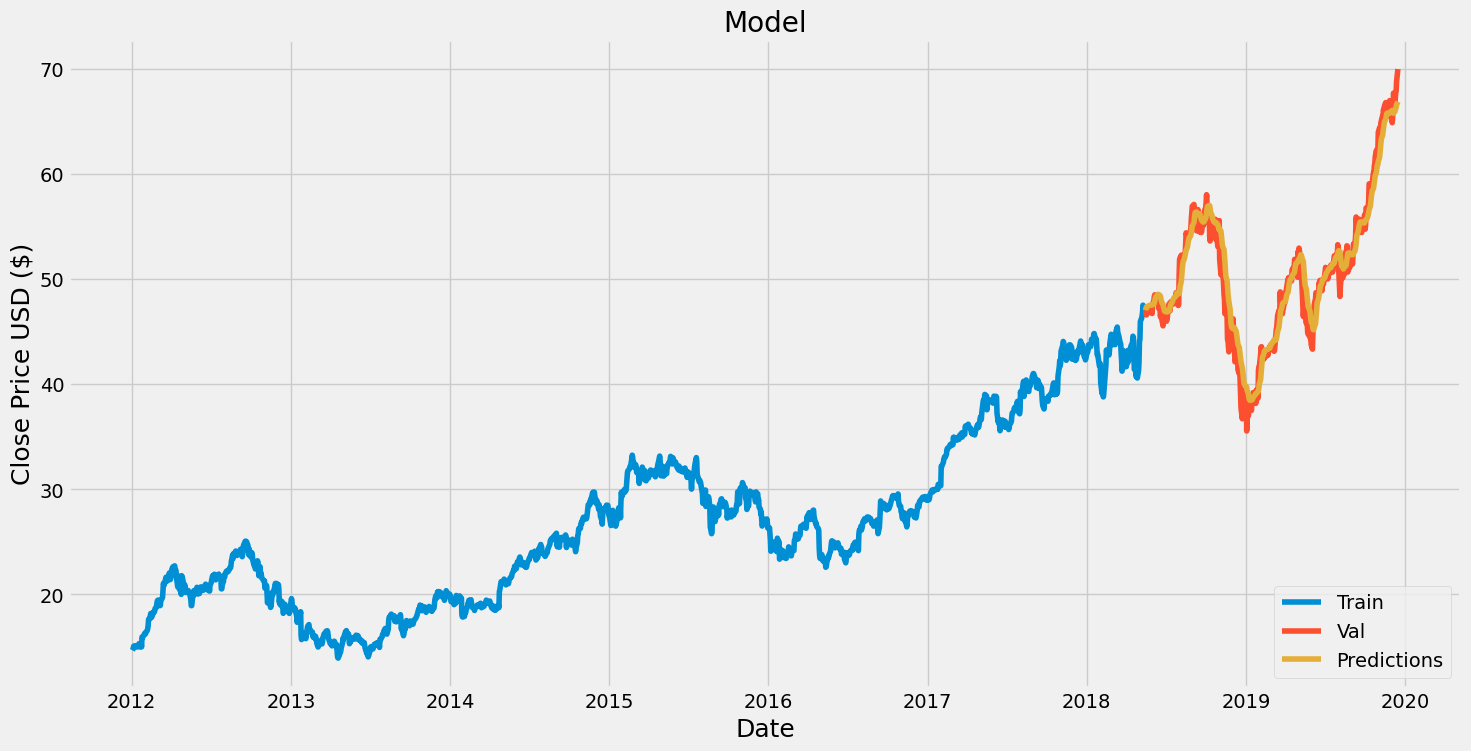

In [ ]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
!pip install tensorflow


In [ ]:
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
import numpy as np

In [ ]:
valid

,Close,Predictions
Date,,
2018-05-16,47.044998,47.021862
2018-05-17,46.747501,47.226475
2018-05-18,46.577499,47.346718
2018-05-21,46.907501,47.394825
2018-05-22,46.790001,47.430954
...,...,...
2019-12-10,67.120003,66.024811
2019-12-11,67.692497,66.167053
2019-12-12,67.864998,66.360641


In [ ]:
apple_quote = yf.download('AAPL', start='2012-01-01', end='2019-12-17')

# Process data
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
scaler = MinMaxScaler(feature_range=(0, 1))
last_60_days_scaled = scaler.fit_transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, return_sequences=True, input_shape=(X_test.shape[1], 1)),
    tf.keras.layers.LSTM(50, return_sequences=False),
    tf.keras.layers.Dense(25),
    tf.keras.layers.Dense(1)
])
model.compile(optimizer='adam', loss='mean_squared_error')

predicted_price = model.predict(X_test)
predicted_price = scaler.inverse_transform(predicted_price)
print(predicted_price)

[*********************100%%**********************]  1 of 1 completed
/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 328ms/step
[[53.860126]]


In [ ]:
!pip install pandas_datareader
import pandas_datareader as web
import yfinance as yf # import the yfinance library and assign it to the variable yf

apple_quote2 = yf.download('AAPL', start='2012-01-01', end='2019-12-17') # use yf.download to get the data
print(apple_quote2['Close'])

[*********************100%%**********************]  1 of 1 completed

Date
2012-01-03    14.686786
2012-01-04    14.765714
2012-01-05    14.929643
2012-01-06    15.085714
2012-01-09    15.061786
                ...    
2019-12-10    67.120003
2019-12-11    67.692497
2019-12-12    67.864998
2019-12-13    68.787498
2019-12-16    69.964996
Name: Close, Length: 2002, dtype: float64
